Kyla Golston\
Module B Part 2\
Due 1/30/21


Section 17.4 Lagrange Polynomial Interpolation\
Below I have utilized the textbook's code to help solve an example in the following link:
https://coast.nd.edu/jjwteach/www/www/30125/pdfnotes/lecture3_6v13.pdf

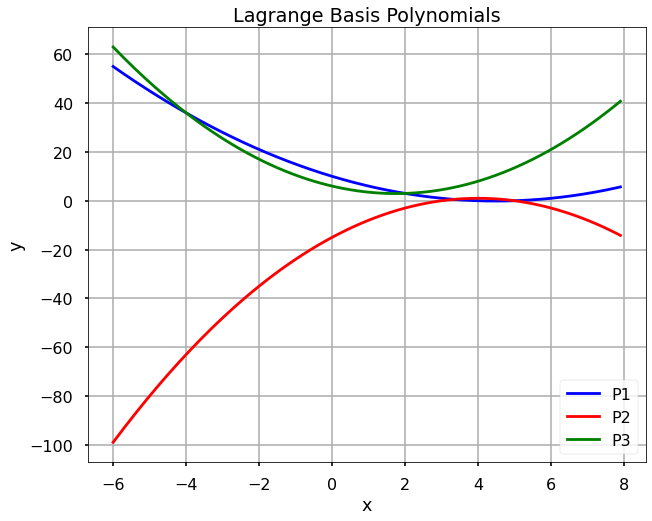

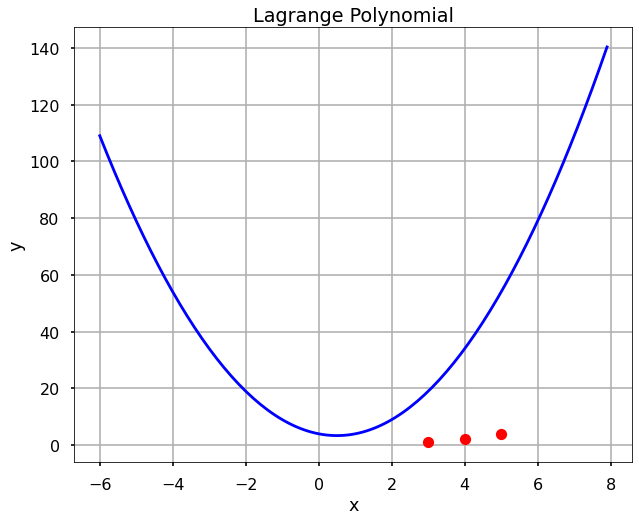

In [14]:
#Find the Lagrange basis polynomials for the data set
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [3, 4, 5]
y = [1, 2, 4]
P1_coeff = [10, -4.5, 0.5]
P2_coeff = [-15, 8, -1]
P3_coeff = [6, -3.5, 1]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-6, 8, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

#plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


#For the previous example, compute and plot the Lagrange polynomial and verify that it goes through each of the data points.
L = P1 + 2*P2 + 4*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

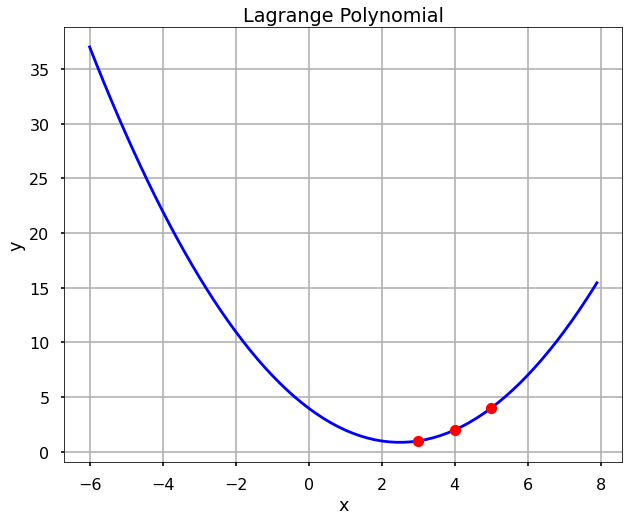

In [15]:
#Using lagrange from scipy
from scipy.interpolate import lagrange
f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Section 17.5 Newton’s Polynomial Interpolation\
Below I have utilized the textbook's code to help solve an example in the following link:
https://nptel.ac.in/content/storage2/courses/122104019/numerical-analysis/Rathish-kumar/rathish-oct31/fratnode6.html

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


In [18]:

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


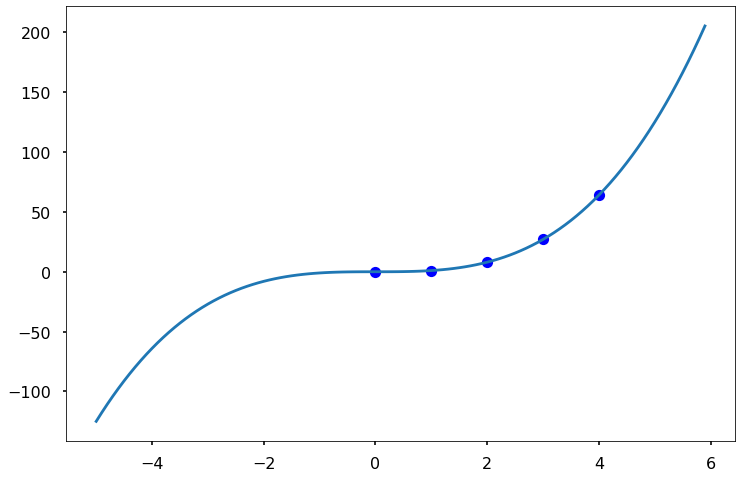

In [22]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 8, 27, 64])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 6, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)